In [35]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import sklearn

In [36]:
df = pd.read_csv(r"D:\scrappy tuto\Twitter.csv")
df.head()

,Unnamed: 0,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,41370,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,Sana all na lang.,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,27955,22dc5f808a8589186767412f39e5c88ae9753d04,キスマイ玉森裕太「ボス恋」台本の裏話明かす\n\n@TBS_asachan @bosskoi...,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02+00:00,0.0,1.0,10.0,1.0,0.0,110.0
2,38151,7f224e66ad757e3066d45947881bcaab91f8e57f,SuperM’s album isn’t even out yet and there’s ...,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32+00:00,0.0,0.0,0.0,0.0,0.0,0.0
3,13558,5acc220e7a337efafc4c847b7f74680ca2515890,மத்திய அரசின் நலத்திட்டங்களை மக்களுக்கு சென்று...,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53+00:00,0.0,1.0,460.0,219.0,4.0,6830.0
4,17071,863abf834897a06afdc459788b34abeae6298f3a,【熊本県人吉市】球磨川氾濫後のくま川鉄道の線路被害状況 hamusoku.com/archi...,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16+00:00,0.0,0.0,0.0,0.0,0.0,0.0


from time import sleep
from textblob import TextBlob
from textblob.exceptions import NotTranslated    

def translate_comment(x):
    try:
        # Try to translate the string version of the comment
        return TextBlob(str(x)).translate(to='en')
    except NotTranslated:
        # If the output is the same as the input just return the TextBlob version of the input
        return TextBlob(str(x))

for i in range(len(df['Post Contet'])):
    # Translate one comment at a time
    df['Post Contet'].iloc[i] = translate_comment(df['Post Contet'].iloc[i])

    # Sleep for a quarter of second
    sleep(0.25)

from langdetect import detect
df['lang'] = df['Post Contet'].map(lambda x: detect(x))
df = df[df['lang']=='en']

In [37]:
df.isna().sum()
#Data set proves no null value present. Thank god handling null values takes lot of time!!!!

Unnamed: 0              0
Id                      0
Post Contet             0
Sentiment score         0
Post Length             0
Hashtag count           0
Content URL count       0
Tweet count             0
Followers count         0
Listed Count            0
Media Type              0
Published DateTime      0
Mentions Count          0
Post author verified    0
Likes                   0
Shares                  0
Comments                0
Impact                  0
dtype: int64

In [38]:
#Importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

The columns Id,Post Contet is dropped. I have not used any pre-processing operations. For unique identity unamed 0: is retained. Post content is dropped as all the necessary content is stored in columns to us from Chronicle’s engineering team. (Thanks to them )

In [39]:
df.drop(["Id",'Post Contet','Unnamed: 0',],axis=1,inplace=True)

In [40]:
df.columns

Index(['Sentiment score', 'Post Length', 'Hashtag count', 'Content URL count',
       'Tweet count', 'Followers count', 'Listed Count', 'Media Type',
       'Published DateTime', 'Mentions Count', 'Post author verified', 'Likes',
       'Shares', 'Comments', 'Impact'],
      dtype='object')

In [41]:
# This column is found to have categories!!!! Lets handle them and convert to numbering type so we fit our models easily(Bindass!!)
df['Media Type'].unique()

array(['TEXT', 'IMAGE', 'VIDEO'], dtype=object)

In [42]:
#Am doing a simple value change not using any encoding things. Keeping the approach simple. :)
df['Media Type'].replace(to_replace=['TEXT', 'IMAGE', 'VIDEO'], value=[1, 2, 3], inplace=True)

The Chronicle’s engineering team has bunched the date and time to single column. I dont like to drop that feature while modelling the models. But, to keep the model simple the column can be dropped. As of now will preserve it. 
If time doesnot permit me to use the column am dropping it. 

Below are the steps to do feature engineering for the column published datetime.
Finally am dropping Published DateTime column to avoid redundency 

In [43]:
df['Date'] = pd.to_datetime(df['Published DateTime'], format='%Y-%m-%d %H:%M:%S')

In [44]:
df['Date'].dtype

datetime64[ns, UTC]

In [45]:
df['date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')

In [46]:
df['minutes'] = df['Date'].dt.hour * 60 + df['Date'].dt.minute + df['Date'].dt.second/60

In [47]:
df=df.drop(["Published DateTime","Date"],axis=1)

In [48]:
df.head()

,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Mentions Count,Post author verified,Likes,Shares,Comments,Impact,date_delta,minutes
0,0.0,17.0,0.0,0.0,1660.0,133.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,302.735856,737.400000
1,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,1,0.0,1.0,10.0,1.0,0.0,110.0,329.509213,411.033333
2,0.0,78.0,0.0,0.0,39976.0,1560.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,167.276921,76.533333
3,0.0,284.0,2.0,0.0,8045.0,27191.0,26,1,0.0,1.0,460.0,219.0,4.0,6830.0,319.386192,233.883333
4,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,94.769792,786.266667


In [49]:
#Am choosing all the columns for x by dropping the impact column and considering impact column for target value 
x = df.drop("Impact",axis=1)
y = df.loc[:,["Impact"]]
x.columns
#y.columns

Index(['Sentiment score', 'Post Length', 'Hashtag count', 'Content URL count',
       'Tweet count', 'Followers count', 'Listed Count', 'Media Type',
       'Mentions Count', 'Post author verified', 'Likes', 'Shares', 'Comments',
       'date_delta', 'minutes'],
      dtype='object')

# Scatter Plot

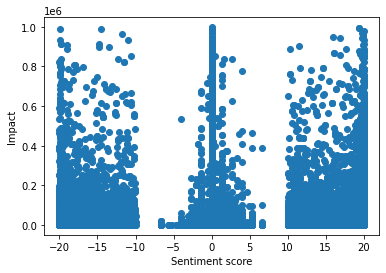

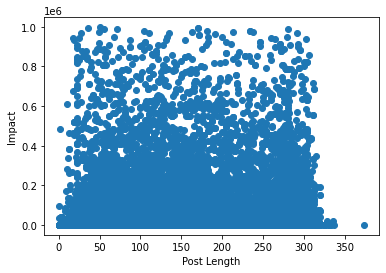

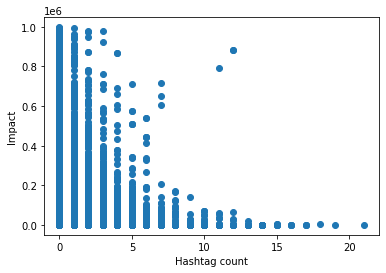

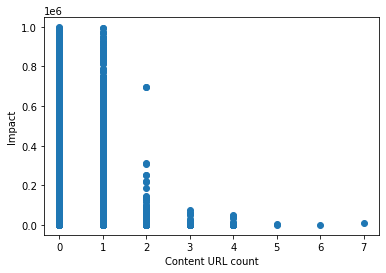

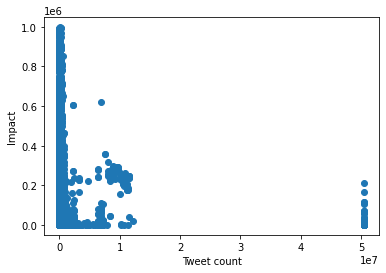

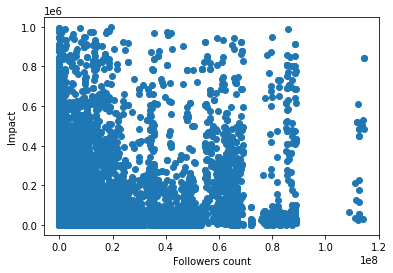

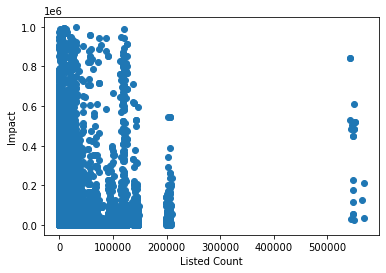

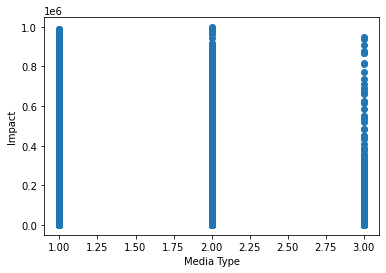

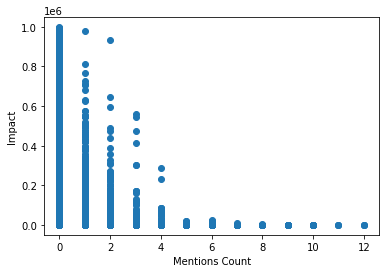

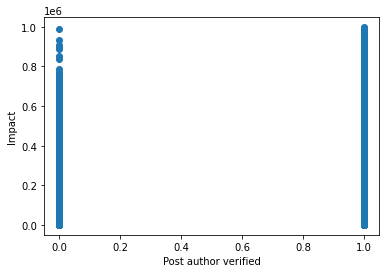

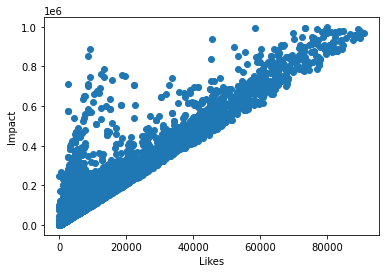

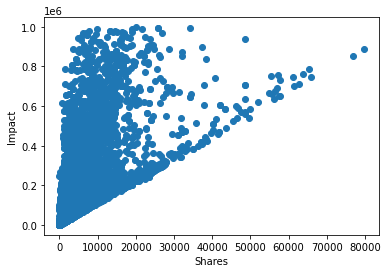

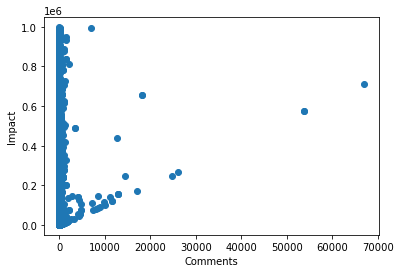

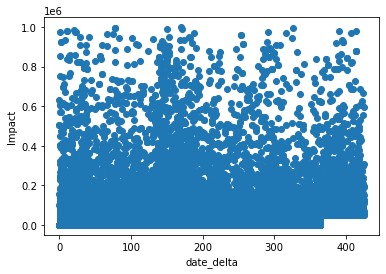

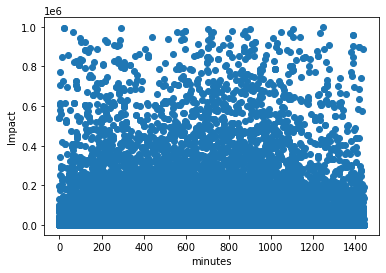

In [50]:
from matplotlib import pyplot as plt
for i in x.columns:
    plt.scatter(x[i], y)
    plt.xlabel(i)
    plt.ylabel("Impact")
    plt.show()


# Decision Tree

In [51]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=50)

In [52]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state = 0)

In [53]:
dtree.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=0)

In [54]:
pred_dt = dtree.predict(xtest)

In [55]:
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(pred_dt , ytest)
tab.diagonal().sum() * 100/tab.sum()

49.88

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
params = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [61]:
estimator = ensemble.GradientBoostingRegressor(**params)
estimator.fit(x_train, y_train.values.ravel())
mse = mean_squared_error(y_test, estimator.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1454538537.6416


In [58]:
y_pred = estimator.predict(xtest)
print("Predictions  :", y_pred)

Predictions  : [37084.48202196 37084.48202196 46879.09075823 ... 37084.48202196
 37084.48202196 37084.48202196]


In [59]:
print("R^2 value: ", estimator.score(x,y))

R^2 value:  0.1574569559072403


# Linear Regreesion

In [ ]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [ ]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()

In [ ]:
ln.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
pred_value=ln.predict(xtest)
pred_value

array([[    -0.352],
       [   129.798],
       [106410.242],
       ...,
       [    -0.466],
       [129260.214],
       [  1440.052]])

In [ ]:
#Checking the shape of Training Data
xtrain.shape

(40000, 15)

In [ ]:
K=15
N=40000
Rsq=ln.score(xtrain,ytrain)
Adjacent_Rsq = 1-(1-Rsq)*(N-1)/(N-K-1)

print("Rsquare value is...",Rsq)
print("Adjacent Rsquare is..",Adjacent_Rsq)

Rsquare value is... 0.9999999978603458
Adjacent Rsquare is.. 0.9999999978595431


# Neural Network

In [ ]:
#pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Attempting

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.5.0


In [ ]:
model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation = "relu")
  ])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics = "mean_absolute_error")

In [ ]:
input_shape = x.shape  
model.build(input_shape) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (50000, 64)               1024      
_________________________________________________________________
dense_1 (Dense)              (50000, 64)               4160      
_________________________________________________________________
dense_2 (Dense)              (50000, 1)                65        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(xtrain, ytrain,epochs=20,validation_split = 0.2)

Epoch 1/20
1000/1000 [==============================] - 2s 1ms/step - loss: 44871.9531 - mean_absolute_error: 44871.9531 - val_loss: 29646.1738 - val_mean_absolute_error: 29646.1738
Epoch 2/20
1000/1000 [==============================] - 1s 1ms/step - loss: 29664.2832 - mean_absolute_error: 29664.2832 - val_loss: 30455.9277 - val_mean_absolute_error: 30455.9277
Epoch 3/20
1000/1000 [==============================] - 1s 1ms/step - loss: 27466.0254 - mean_absolute_error: 27466.0254 - val_loss: 22029.7715 - val_mean_absolute_error: 22029.7715
Epoch 4/20
1000/1000 [==============================] - 1s 1ms/step - loss: 26313.9980 - mean_absolute_error: 26313.9980 - val_loss: 24247.1738 - val_mean_absolute_error: 24247.1738
Epoch 5/20
1000/1000 [==============================] - 1s 1ms/step - loss: 28758.7578 - mean_absolute_error: 28758.7578 - val_loss: 31460.3418 - val_mean_absolute_error: 31460.3418
Epoch 6/20
1000/1000 [==============================] - 1s 1ms/step - loss: 29136.3164 - m

In [ ]:
test_results = {}
test_results['linear_model'] = model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 1ms/step - loss: 4917.0801 - mean_absolute_error: 4917.0801
